In [1]:
import pandas as pd

In [2]:
caqtls = pd.read_csv("Eu.new.CaQTLS.tsv", sep="\t", header=0)

In [63]:
afrs = pd.read_csv("Afr.CaQTLS.new.tsv", sep="\t", header=0)
afrs = afrs[afrs["IsUsed"]]

In [64]:
caqtls[["chr", "Pos", "Ref", "Alt"]].drop_duplicates().shape

(177813, 4)

In [65]:
caqtls.shape

(226346, 28)

In [66]:
# caqtls[caqtls["Inside_Peak"]==2][["chr", "Pos", "Ref", "Alt"]].drop_duplicates().shape

In [67]:
# distal_effects = caqtls[caqtls["Inside_Peak"]==2][["chr", "Pos", "Ref", "Alt"]].drop_duplicates()[["chr", "Pos", "Ref", "Alt"]]


In [68]:
# distal_effects.head()

In [69]:
# caqtls = caqtls[caqtls["IsUsed"] & caqtls["Inside_Peak"]==1]


In [70]:
# caqtls.loc[:,["chr", "Pos", "Ref", "Alt"]].isin(distal_effects[["chr", "Pos", "Ref", "Alt"]])

In [71]:
# import numpy as np
# df = pd.merge(caqtls, distal_effects, on=["chr", "Pos", "Ref", "Alt"], how='left', indicator='Exist')
# df['Exist'] = np.where(df.Exist == 'both', True, False)

In [72]:
#sum(df['Exist'])

In [73]:
#df.shape

In [74]:
caqtls.shape

(226346, 28)

In [75]:
caqtls.shape

(226346, 28)

In [76]:
caqtls[caqtls["Inside_Peak"]==2].shape

(41153, 28)

In [77]:
caqtls[caqtls["Inside_Peak"]==2].head()

,chr,Pos,Ref,Alt,RsID,Peak,AF,Inside_Peak,P_Lead,Beta,...,ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean,ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean.pval,ENCSR000EMT.logfc.mean,ENCSR000EMT.jsd_sign.mean,ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean,ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean.pval,enformer_recomputed,DNASE_SAD,DNASE_SAR,IsUsed
0,chr1,875770,A,G,rs4970379,3,0.625,2,0.044994,0.155446,...,0.000367,0.121047,-0.018701,-0.013757,0.000165,0.505239,NaN,0.000178,0.000233,True
44,chr1,1186502,A,T,rs6603785,66,0.165,2,0.273108,0.074079,...,0.015608,0.002812,-0.613550,-0.059538,0.021172,0.333333,NaN,-0.006530,-0.007840,True
45,chr1,1186502,A,T,rs6603785,67,0.165,2,0.493991,-0.046797,...,0.015608,0.002812,-0.613550,-0.059538,0.021172,0.333333,NaN,-0.006530,-0.007840,True
84,chr1,1590681,G,A,rs9661500,125,0.655,2,0.082582,-0.023552,...,0.000077,0.249567,0.037795,0.024868,0.001097,0.333333,NaN,0.000106,0.000124,True
144,chr1,2508343,G,C,rs200553981,194,0.350,2,0.340515,0.017197,...,0.011033,0.004075,0.177735,0.039674,0.003995,0.333333,NaN,0.002804,0.003008,True


In [78]:
caqtls[caqtls["Inside_Peak"]==2]["RsID"].values

array(['rs4970379', 'rs6603785', 'rs6603785', ..., 'rs138248257',
       'rs138248257', 'rs138248257'], dtype=object)

In [79]:
caqtls[caqtls["Inside_Peak"]==2].shape

(41153, 28)

In [97]:
sum(caqtls[caqtls["Inside_Peak"]==1]["RsID"].isin(caqtls[caqtls["Inside_Peak"]==2]["RsID"].values))

5321

In [81]:
sum(caqtls[caqtls["Inside_Peak"]==1]["RsID"].isin(caqtls[caqtls["Log10_BF"]==0]["RsID"].values))

0

In [148]:
caqtls = pd.read_csv("Eu.new.CaQTLS.tsv", sep="\t", header=0)


In [128]:
distal_rsids = list(set(caqtls[(caqtls["Inside_Peak"]==2) & (caqtls["Log10_BF"]>-1)]["RsID"].values))


In [52]:
len(distal_rsids)

5787

In [53]:

#distal_rsids = list(set(caqtls[(caqtls["Inside_Peak"]==2)]["RsID"].values))

In [54]:
len(distal_rsids)

5787

In [149]:
caqtls = caqtls[caqtls["IsUsed"] & caqtls["Inside_Peak"]==1]


In [57]:
sum(caqtls[caqtls["Log10_BF"]>3]["RsID"].isin(distal_rsids))

2550

In [58]:
len(set(caqtls[caqtls["Log10_BF"]>3]["RsID"]))

9851

In [59]:
index = caqtls[caqtls["Log10_BF"]>3]["RsID"].isin(distal_rsids)
len(set(caqtls[caqtls["Log10_BF"]>3][index]["RsID"]))

2550

In [170]:
caqtls1 = pd.concat([caqtls[caqtls["RsID"].isin(distal_rsids)]]).drop_duplicates()
caqtls2 = pd.concat([caqtls[~caqtls["RsID"].isin(distal_rsids)]]).drop_duplicates()
caqtls1 = caqtls1[caqtls1["Log10_BF"]>3]
caqtls2 = caqtls2[caqtls2["Log10_BF"]>3]



In [171]:
caqtls1.shape


(2550, 28)

In [172]:
caqtls2.shape


(7301, 28)

In [212]:
ths =[]
num_set1 = []
num_set2 = []
for threshold in np.arange(3,23,2):
    print(threshold)
    ths.append(threshold)
    #num_set1.append(caqtls1[caqtls1["Log10_BF"]>threshold].shape[0])
    #num_set2.append(caqtls2[caqtls2["Log10_BF"]>threshold].shape[0])
    
    num_set1.append(pearsonr(caqtls1[caqtls1["Log10_BF"]>threshold]['Beta'], caqtls1[caqtls1["Log10_BF"]>threshold]['ENCSR637XSC.logfc.mean']*1)[0])
    num_set2.append(pearsonr(caqtls2[caqtls2["Log10_BF"]>threshold]['Beta'], caqtls2[caqtls2["Log10_BF"]>threshold]['ENCSR637XSC.logfc.mean']*1)[0])
#    num_set1.append(pearsonr(abs(caqtls1[caqtls1["Log10_BF"]>threshold]['Beta']), abs(caqtls1[caqtls1["Log10_BF"]>threshold]['ENCSR637XSC.logfc.mean']))[0])
#    num_set2.append(pearsonr(abs(caqtls2[caqtls2["Log10_BF"]>threshold]['Beta']), abs(caqtls2[caqtls2["Log10_BF"]>threshold]['ENCSR637XSC.logfc.mean']))[0])
    

3
5
7
9
11
13
15
17
19
21


In [213]:
#num_set1

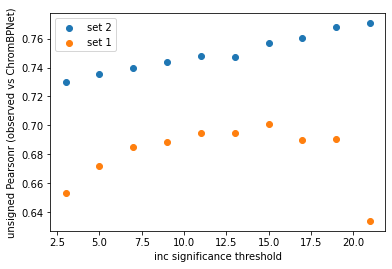

In [214]:
plt.scatter(ths, num_set1, label="set 2")
plt.scatter(ths, num_set2, label="set 1")
plt.xlabel("inc significance threshold")
#plt.ylabel("total significant variants at a threshold")
plt.ylabel("unsigned Pearsonr (observed vs ChromBPNet)")
plt.legend()

In [109]:
7301+2550

9851

In [71]:
import matplotlib.pyplot as plt

In [72]:
caqtls1

,chr,Pos,Ref,Alt,RsID,Peak,AF,Inside_Peak,P_Lead,Beta,...,ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean,ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean.pval,ENCSR000EMT.logfc.mean,ENCSR000EMT.jsd_sign.mean,ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean,ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean.pval,enformer_recomputed,DNASE_SAD,DNASE_SAR,IsUsed
56,chr1,1186502,A,T,rs6603785,84,0.16500,1,0.995510,-0.406159,...,1.560834e-02,0.002812,-0.613550,-0.059538,0.021172,0.333333,0.955810,-6.530000e-03,-7.840000e-03,True
162,chr1,2508343,G,C,rs200553981,213,0.35000,1,0.999924,0.226942,...,1.103318e-02,0.004075,0.177735,0.039674,0.003995,0.333333,-0.182859,2.804000e-03,3.008000e-03,True
173,chr1,2615134,C,G,rs78125432,223,0.31310,1,0.366991,0.704901,...,7.490562e-07,0.816993,0.042428,0.014587,0.000017,0.580367,0.001052,-3.600000e-07,-5.000000e-07,True
218,chr1,3820005,G,A,rs10909828,277,0.34500,1,0.999966,-0.654595,...,4.141986e-02,0.000489,-0.618973,-0.086568,0.024578,0.333333,0.094186,-3.593000e-04,-4.478000e-04,True
226,chr1,4327635,C,T,rs2101576,286,0.55000,1,0.999782,-0.666789,...,2.266398e-02,0.001471,-0.689615,-0.048458,0.024916,0.333333,0.810135,-3.294000e-03,-4.560000e-03,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225992,chr22,42925131,A,G,rs2413698,276699,0.78985,1,0.999988,-1.477181,...,1.059423e-01,0.000049,-0.870185,-0.141672,0.049538,0.333333,1.248557,-8.030000e-03,-9.970000e-03,True
226103,chr22,44845516,T,C,rs133770,276841,0.45500,1,0.297393,-0.395199,...,8.842590e-03,0.005253,-0.337324,-0.043263,0.008894,0.333333,0.376536,-2.384000e-03,-3.248000e-03,True
226135,chr22,45642907,T,C,rs6006956,276879,0.50000,1,0.748201,0.619708,...,1.322327e-02,0.003211,0.437278,0.067900,0.017931,0.333333,-0.549798,6.200000e-03,7.607000e-03,True
226225,chr22,48314463,G,A,rs5768156,276995,0.41000,1,1.000000,1.627204,...,1.164257e-02,0.004596,0.327306,0.043628,0.009750,0.333333,-0.280423,2.985000e-03,4.097000e-03,True


In [78]:
from scipy.stats import pearsonr


In [153]:
pearsonr(abs(caqtls1['Beta']), abs(caqtls1['enformer_recomputed']))

(0.31340149962392755, 3.155029122286477e-59)

In [154]:
pearsonr(abs(caqtls2['Beta']), abs(caqtls2['enformer_recomputed']))

(0.19695670888399872, 2.1534071315904045e-24)

In [155]:
pearsonr(abs(caqtls2['Beta']), abs(caqtls2['ENCSR637XSC.logfc.mean']))

(0.25434669792692144, 4.444001061181763e-40)

In [156]:
pearsonr(abs(caqtls1['Beta']), abs(caqtls1['ENCSR637XSC.logfc.mean']))

(0.383422273233087, 4.315239001906426e-90)

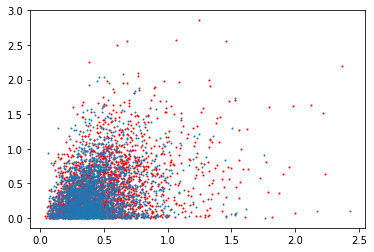

In [169]:
plt.scatter(abs(caqtls1['Beta']), abs(caqtls1['ENCSR637XSC.logfc.mean']), s=1, c='r')
plt.scatter(abs(caqtls2['Beta']), abs(caqtls2['ENCSR637XSC.logfc.mean']), s=1)


Text(0.5, 0, 'observed Beta')

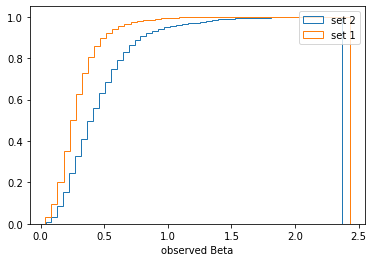

In [126]:
plt.hist(abs(caqtls1['Beta']),50, alpha=1, density=True, histtype="step", cumulative=True, label="set 2")
plt.hist(abs(caqtls2['Beta']),50, alpha=1, density=True, histtype="step", cumulative=True, label="set 1")
plt.legend()
plt.xlabel("observed Beta")

In [62]:
caqtls1.shape

(11947, 28)

In [130]:
import numpy as np


#caqtls[(caqtls["Inside_Peak"]==2) & (caqtls["Log10_BF"]>-1)]["RsID"]


caqtls = pd.concat([caqtls[caqtls["Log10_BF"]<-1],  caqtls[caqtls["RsID"].isin(distal_rsids)]]).drop_duplicates()
caqtls = pd.concat([caqtls[caqtls["Log10_BF"]<-1],  caqtls[caqtls["RsID"].isin(distal_rsids)]]).drop_duplicates()

# caqtls = caqtls[caqtls["IsUsed"]]
# caqtls = caqtls.sort_values('Log10_BF').drop_duplicates(["chr", "Ref", "Alt", "Pos"], keep='last')


In [131]:
len(set(caqtls[caqtls["Log10_BF"]>3]["RsID"]))

2550

In [123]:
len(set(caqtls[caqtls["Log10_BF"]<-1]["RsID"]))

111915

In [29]:
111915+7301

119216

In [30]:
# caqtls = caqtls[caqtls["Inside_Peak"]==1]
# caqtls.shape

In [31]:
caqtls.shape

(153456, 28)

In [36]:
caqtls.head()

,chr,Pos,Ref,Alt,RsID,Peak,AF,Inside_Peak,P_Lead,Beta,...,ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean,ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean.pval,ENCSR000EMT.logfc.mean,ENCSR000EMT.jsd_sign.mean,ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean,ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean.pval,enformer_recomputed,DNASE_SAD,DNASE_SAR,IsUsed
6,chr1,726944,C,G,rs3131979,14,0.74175,1,0.953905,-0.079065,...,0.000001,0.802258,0.026410,0.010944,2.107834e-05,0.580367,-0.001038,0.000100,0.000133,True
7,chr1,752721,A,G,rs3131972,17,0.84500,1,0.890193,-0.011374,...,0.012412,0.003650,0.338401,0.047837,1.246855e-02,0.333333,-0.344077,0.002493,0.003319,True
8,chr1,755940,C,T,rs3115857,18,0.59380,1,0.302008,-0.077224,...,0.000004,0.674640,-0.026630,-0.011550,2.854755e-07,0.666667,-0.007762,0.000022,0.000029,True
10,chr1,793429,T,C,rs200956863,21,0.72345,1,0.407804,0.006696,...,0.000526,0.072640,0.055559,0.018649,7.959288e-04,0.333333,-0.012475,0.000175,0.000233,True
12,chr1,805556,T,A,rs72631880,23,0.07000,1,0.665134,-0.081155,...,0.000139,0.195813,-0.000459,-0.008914,7.226519e-05,0.505239,-0.002396,-0.000139,-0.000184,True


In [22]:
caqtls.columns

Index(['chr', 'Pos', 'Ref', 'Alt', 'RsID', 'Peak', 'AF', 'Inside_Peak',
       'P_Lead', 'Beta', 'SE', 'Log10_BF', 'ENCSR637XSC.logfc.mean',
       'ENCSR637XSC.jsd_sign.mean',
       'ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'ENCSR637XSC.sub.50M.logfc.mean', 'ENCSR637XSC.sub.50M.jsd_sign.mean',
       'ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'ENCSR000EMT.logfc.mean', 'ENCSR000EMT.jsd_sign.mean',
       'ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'enformer_recomputed', 'DNASE_SAD', 'DNASE_SAR', 'IsUsed'],
      dtype='object')

In [23]:
peaks = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/caqtls_lcl_latest/peaks.bed.gz", sep='\t', header=0)


In [24]:
peaks.head()

,#Chr,Pos_Left,Pos_Right,Peak,GC,Peak_Height,P_caQTL,PMR,P_eQTL_Coloc
0,1,9866,10709,1,57.6422,4504,0.005961,0.000650,0.001069
1,1,16019,16819,2,54.9313,700,0.002610,0.000197,0.000396
2,1,28870,29662,3,74.4010,2234,0.014269,0.000830,0.003304
3,1,235424,236104,4,41.4097,2003,0.012361,0.000636,0.002777
4,1,237485,238046,5,46.9751,4162,0.024590,0.000912,0.007109


In [25]:
peaks["#Chr"] = 'chr'+peaks["#Chr"].astype(str)

In [26]:
peaks.head()

,#Chr,Pos_Left,Pos_Right,Peak,GC,Peak_Height,P_caQTL,PMR,P_eQTL_Coloc
0,chr1,9866,10709,1,57.6422,4504,0.005961,0.000650,0.001069
1,chr1,16019,16819,2,54.9313,700,0.002610,0.000197,0.000396
2,chr1,28870,29662,3,74.4010,2234,0.014269,0.000830,0.003304
3,chr1,235424,236104,4,41.4097,2003,0.012361,0.000636,0.002777
4,chr1,237485,238046,5,46.9751,4162,0.024590,0.000912,0.007109


In [27]:
peaks['center'] = (peaks['Pos_Left']+peaks['Pos_Right'])/2

In [28]:
peaks.shape

(277128, 10)

In [35]:
peaks_ids = np.arange(277128)+1


In [36]:
sum(peaks["Peak"]==peaks_ids)

277128

In [37]:
caqtls['Peak']=caqtls['Peak']-1

In [38]:
caqtls['Peak'].max()

277127

In [39]:
caqtls['peak_cente'] = caqtls['Peak'].map(peaks['center'])


In [40]:
caqtls['peak_cente']

2           565396.0
3           569416.5
6           726976.0
7           752591.5
8           756027.5
             ...    
226341    51021367.0
226342    51059604.0
226343    51066695.5
226344    51082338.0
226345    51222113.5
Name: peak_cente, Length: 151409, dtype: float64

In [41]:
var_center_dist = abs(caqtls['Pos']-caqtls['peak_cente'])

In [43]:
#caqtls = caqtls[var_center_dist<=100]

<AxesSubplot:>

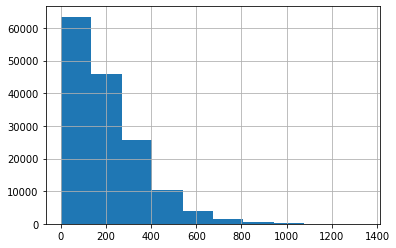

In [44]:
var_center_dist.hist()

In [45]:
caqtls.shape

(151409, 29)

In [46]:

dbsnp = np.loadtxt('test_rsids.txt', dtype='str')

In [47]:
dbsnp

array(['rs36197555', 'rs72645889', 'rs12747702', ..., 'rs6002950',
       'rs5751390', 'rs738406'], dtype='<U11')

In [48]:
sum(caqtls['RsID'].isin(dbsnp))

1078

In [49]:
sum(caqtls['RsID'].isin(dbsnp))

1078

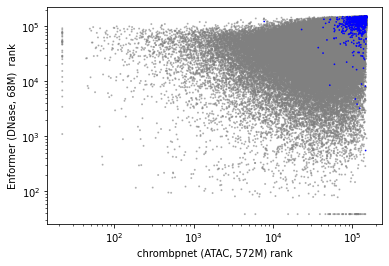

In [50]:
from scipy.stats import rankdata
import numpy as np
import matplotlib.pyplot as plt

rank_chrom_atac = rankdata(abs(caqtls["ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean"]))
enf = rankdata(abs(caqtls["enformer_recomputed"]))
colors = np.array(['grey']*caqtls.shape[0])
threshold=3
colors[caqtls["Log10_BF"]>threshold] = 'r'
colors[caqtls["RsID"].isin(dbsnp)] = 'blue'
plt.scatter(rank_chrom_atac[caqtls["Log10_BF"]<-1], enf[caqtls["Log10_BF"]<-1], alpha=0.5, s=1, color=colors[caqtls["Log10_BF"]<-1])
#plt.scatter(rank_chrom_atac[caqtls["Log10_BF"]>threshold], enf[caqtls["Log10_BF"]>threshold], s=0.5, color=colors[caqtls["Log10_BF"]>threshold])
#plt.scatter(rank_chrom_atac[(~caqtls["RsID"].isin(dbsnp)) & (caqtls["Log10_BF"]>threshold)], enf[(~caqtls["RsID"].isin(dbsnp)) & (caqtls["Log10_BF"]>threshold)], s=0.5, color=colors[(~caqtls["RsID"].isin(dbsnp)) & (caqtls["Log10_BF"]>threshold)])
plt.scatter(rank_chrom_atac[caqtls["RsID"].isin(dbsnp)], enf[caqtls["RsID"].isin(dbsnp)], s=0.5, color=colors[caqtls["RsID"].isin(dbsnp)])

plt.xlabel("chrombpnet (ATAC, 572M) rank")
plt.ylabel("Enformer (DNase, 68M)  rank")
plt.yscale('log')
plt.xscale('log')

In [51]:
print(caqtls.shape)
#caqtls = caqtls[~caqtls["RsID"].isin(dbsnp)]

(151409, 29)


In [52]:
caqtls.shape

(151409, 29)

# AUPRC (Benchmarking)

In [132]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve

random_bc = []
chrombpnet = {}
enformer_dnase_roc = []
enformer_dnase_roc_sar = []

chrombpnet["ChromBPNet DNase (68M)"] = []
chrombpnet["ChromBPNet ATAC (572M)"] = []
chrombpnet["ChromBPNet ATAC (50M)"] = []

for threshold in np.arange(3,23,2):
    print(threshold)
    
#     dataf1 = caqtls[caqtls["Log10_BF"]>threshold]
#     dataf1["label"] = 1
#     dataf1 = dataf1[["ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean", 
#                     "ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean",
#                      "ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean",
#                     "DNASE_SAR", "enformer_recomputed", "label"]]
    
#     dataf2 = afrs[afrs["label"]==0]
#     dataf2["ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean"] = dataf2["chrombpnet.encsr637xsc.variantscore.csr"]
#     dataf2["ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean"] = dataf2["chrombpnet.encsr637xsc_50m.variantscore.csr"]
#     dataf2["ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean"] = dataf2["chrombpnet.encsr000emt.variantscore.csr"]
#     dataf2["DNASE_SAR"] = dataf2["enformer.encsr000emt.variantscore.sar"]
#     dataf2["enformer_recomputed"] = dataf2["enformer_recomputed"]
#     #print(dataf2["enformer_recomputed"])
#     dataf2 = dataf2[["ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean", 
#                     "ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean",
#                     "ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean",
#                     "DNASE_SAR",  "enformer_recomputed", "label"]]

#     dataf = pd.concat([dataf1, dataf2])
    dataf = caqtls[(caqtls["Log10_BF"]<-1) | (caqtls["Log10_BF"]>threshold)]
    dataf["label"] = 0
    dataf.loc[dataf["Log10_BF"]>threshold, "label"] = 1
    total = dataf.shape[0]
    sigs = sum(dataf["label"])
    print(sigs, total)
    
    
    random_bc.append(np.round(sigs/total,3))
    print(random_bc[-1])
    
    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean"]))
    chrombpnet["ChromBPNet DNase (68M)"].append(roc_auc)

    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean"]))
    chrombpnet["ChromBPNet ATAC (572M)"].append(roc_auc)
    print(roc_auc)

    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean"]))
    chrombpnet["ChromBPNet ATAC (50M)"].append(roc_auc)
    
    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["enformer_recomputed"]))
    enformer_dnase_roc.append(roc_auc)

    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["DNASE_SAR"]))
    enformer_dnase_roc_sar.append(roc_auc)


3
2550 114465
0.022
0.4415095369386685
5
2271 114186
0.02


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/users/anusri/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0.45755714633350997
7
2005 113920
0.018
0.4704244060146789
9
1769 113684
0.016
0.47143316836547994
11
1547 113462
0.014
0.4768632302057005
13
1304 113219
0.012
0.4774304577037799
15
1082 112997
0.01
0.4842363165605904
17
884 112799
0.008
0.47479501324872725
19
673 112588
0.006
0.46623846442743355
21
503 112418
0.004
0.443974664011063


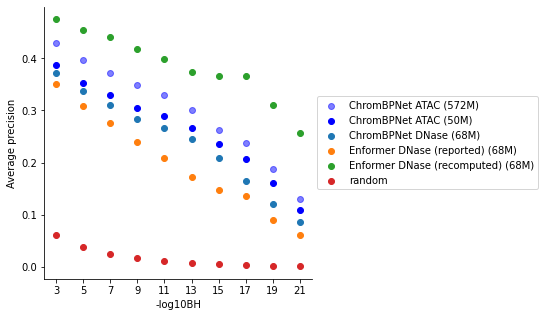

In [125]:
fig, ax = plt.subplots(figsize=(6,5))
colors = ["blue", "blue"]
alphas = [0.5, 1.0]
idx=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)"]:
    ax.scatter(np.arange(3,23,2).astype(str), chrombpnet[key], label=key, c="blue", alpha=alphas[idx])
    idx+=1
    
key="ChromBPNet DNase (68M)"
ax.scatter(np.arange(3,23,2).astype(str), chrombpnet[key], label=key)
ax.scatter(np.arange(3,23,2).astype(str), enformer_dnase_roc_sar, label="Enformer DNase (reported) (68M)")
ax.scatter(np.arange(3,23,2).astype(str), enformer_dnase_roc, label="Enformer DNase (recomputed) (68M)")

ax.scatter(np.arange(3,23,2).astype(str), random_bc, label="random")

ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("-log10BH")
ax.set_ylabel("Average precision")
#plt.legend(loc='upper right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.show()

#plt.savefig("subfigs/eu_caqtls_auprc_compare.pdf", transparent=True, dpi=300)

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve

random_bc = []
chrombpnet = {}
enformer_dnase_roc = []
enformer_dnase_roc_sar = []

chrombpnet["ChromBPNet DNase (68M)"] = []
chrombpnet["ChromBPNet ATAC (572M)"] = []
chrombpnet["ChromBPNet ATAC (50M)"] = []

for threshold in np.arange(3,23,2):
    print(threshold)
    
#     dataf1 = caqtls[caqtls["Log10_BF"]>threshold]
#     dataf1["label"] = 1
#     dataf1 = dataf1[["ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean", 
#                     "ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean",
#                      "ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean",
#                     "DNASE_SAR", "enformer_recomputed", "label"]]
    
#     dataf2 = afrs[afrs["label"]==0]
#     dataf2["ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean"] = dataf2["chrombpnet.encsr637xsc.variantscore.csr"]
#     dataf2["ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean"] = dataf2["chrombpnet.encsr637xsc_50m.variantscore.csr"]
#     dataf2["ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean"] = dataf2["chrombpnet.encsr000emt.variantscore.csr"]
#     dataf2["DNASE_SAR"] = dataf2["enformer.encsr000emt.variantscore.sar"]
#     dataf2["enformer_recomputed"] = dataf2["enformer_recomputed"]
#     #print(dataf2["enformer_recomputed"])
#     dataf2 = dataf2[["ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean", 
#                     "ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean",
#                     "ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean",
#                     "DNASE_SAR",  "enformer_recomputed", "label"]]

#     dataf = pd.concat([dataf1, dataf2])
    dataf = caqtls[(caqtls["Log10_BF"]<-1) | (caqtls["Log10_BF"]>threshold)]
    dataf["label"] = 0
    dataf.loc[dataf["Log10_BF"]>threshold, "label"] = 1
    total = dataf.shape[0]
    sigs = sum(dataf["label"])
    print(sigs, total)
    
    
    random_bc.append(np.round(sigs/total,3))
    print(random_bc[-1])
    
    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean"]))
    chrombpnet["ChromBPNet DNase (68M)"].append(roc_auc)

    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean"]))
    chrombpnet["ChromBPNet ATAC (572M)"].append(roc_auc)
    print(roc_auc)

    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean"]))
    chrombpnet["ChromBPNet ATAC (50M)"].append(roc_auc)
    
    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["enformer_recomputed"]))
    enformer_dnase_roc.append(roc_auc)

    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["DNASE_SAR"]))
    enformer_dnase_roc_sar.append(roc_auc)


3
9851 121766
0.081
0.5316466483102311
5


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


6722 118637
0.057
0.5255050166908499
7
4894 116809
0.042
0.5228369439220858
9
3689 115604
0.032
0.5176397006514095
11
2813 114728
0.025
0.5158678909863839
13
2135 114050
0.019
0.5070998068900187
15
1594 113509
0.014
0.5050438096240829
17
1194 113109
0.011
0.49408221158142424
19
844 112759
0.007
0.48310256455439116
21
597 112512
0.005
0.4512487487386577


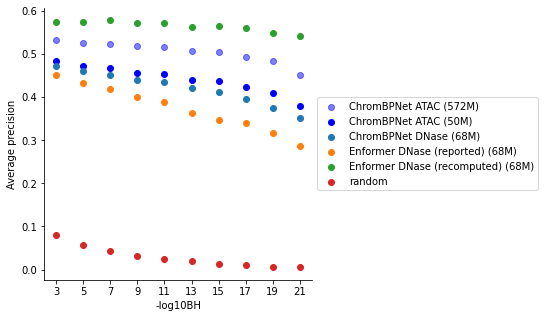

In [61]:
fig, ax = plt.subplots(figsize=(6,5))
colors = ["blue", "blue"]
alphas = [0.5, 1.0]
idx=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)"]:
    ax.scatter(np.arange(3,23,2).astype(str), chrombpnet[key], label=key, c="blue", alpha=alphas[idx])
    idx+=1
    
key="ChromBPNet DNase (68M)"
ax.scatter(np.arange(3,23,2).astype(str), chrombpnet[key], label=key)
ax.scatter(np.arange(3,23,2).astype(str), enformer_dnase_roc_sar, label="Enformer DNase (reported) (68M)")
ax.scatter(np.arange(3,23,2).astype(str), enformer_dnase_roc, label="Enformer DNase (recomputed) (68M)")

ax.scatter(np.arange(3,23,2).astype(str), random_bc, label="random")

ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("-log10BH")
ax.set_ylabel("Average precision")
#plt.legend(loc='upper right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.show()

#plt.savefig("subfigs/eu_caqtls_auprc_compare.pdf", transparent=True, dpi=300)

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/users/anusri/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Text(0, 0.5, 'Precision')

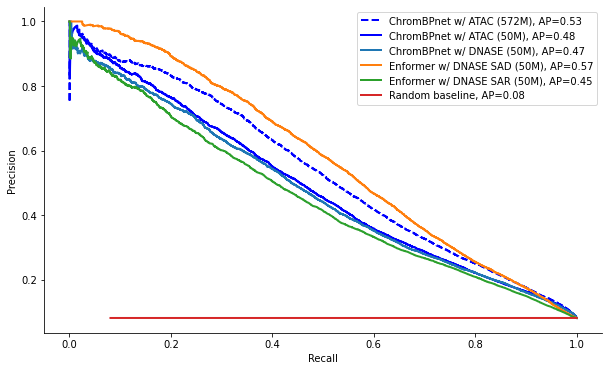

In [40]:

dataf = caqtls[(caqtls["Log10_BF"]<-1) | (caqtls["Log10_BF"]>3)]
dataf["label"] = 0
dataf.loc[dataf["Log10_BF"]>3, "label"] = 1

    
fig, ax = plt.subplots(figsize=(10,6))

######################################

keyd="ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean"

label=dataf["label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ ATAC (572M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean"
label=dataf["label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ ATAC (50M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean"
label=dataf["label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ DNASE (50M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="enformer_recomputed"
label=dataf["label"].astype(int)
score=abs(dataf[keyd])
title="Enformer w/ DNASE SAD (50M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="DNASE_SAR"
label=dataf["label"].astype(int)
score=abs(dataf[keyd])
title="Enformer w/ DNASE SAR (50M)"


fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))
enformer_auc = roc_auc

######################################

roc_auc=sum(dataf["label"]==1)/len(dataf["label"])
ax.plot(fpr_chrombpnet, [sum(dataf["label"]==1)/len(dataf["label"])]*len(fpr_chrombpnet), linewidth=2, label="Random baseline, AP="+str(round(roc_auc,2)))


ax.spines[["top", "right"]].set_visible(False)
ax.legend(loc='upper right')
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

#plt.savefig("subfigs/eu_caqtls_auprc.pdf", transparent=True, dpi=300)

# Pearsonr (benchmarking)

(0.6868906658926365, 0.0)


Text(0.5, 1.0, 'Pearsonr = 0.69')

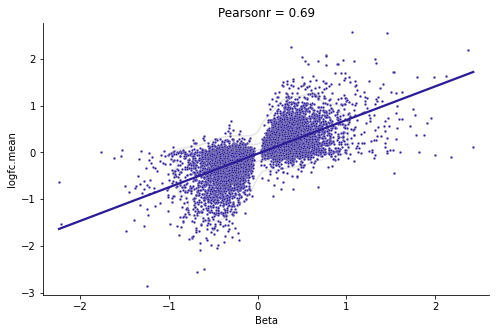

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

plt.figure(figsize=(8,5))
data = pd.DataFrame()
data["logfc.mean"] = caqtls[caqtls["Log10_BF"] > 3]["ENCSR637XSC.logfc.mean"]
data["Beta"] = caqtls[caqtls["Log10_BF"] > 3]["Beta"]

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=6, color="#2B1C97" , rasterized=True)
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#2B1C97")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(data["logfc.mean"],data["Beta"])
print(atc_pear)
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))

#plt.savefig("subfigs/eu_caqtls_pearsonr.pdf", transparent=True, dpi=300)

In [42]:
import scipy.stats
chrombpnet = {}
chrombpnet_unsigned = {}
enformer = []
enformer_unsigned = []
enformer_sar = []
enformer_unsigned_sar = []
chrombpnet["ChromBPNet DNase (68M)"] = []
chrombpnet["ChromBPNet ATAC (572M)"] = []
chrombpnet["ChromBPNet ATAC (50M)"] = []

chrombpnet_unsigned["ChromBPNet DNase (68M)"] = []
chrombpnet_unsigned["ChromBPNet ATAC (572M)"] = []
chrombpnet_unsigned["ChromBPNet ATAC (50M)"] = []

for threshold in np.arange(3,23,2):
    print(threshold)
    dataf = caqtls[(caqtls["Log10_BF"]>threshold)]
        
    pear = scipy.stats.pearsonr(dataf["ENCSR000EMT.logfc.mean"], dataf["Beta"])
    print(pear)

    chrombpnet["ChromBPNet DNase (68M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["ENCSR000EMT.logfc.mean"]), abs(dataf["Beta"]))
    print(pear)

    chrombpnet_unsigned["ChromBPNet DNase (68M)"].append(pear[0])    
 
    pear = scipy.stats.pearsonr(dataf["ENCSR637XSC.logfc.mean"], dataf["Beta"])
    print(pear)

    chrombpnet["ChromBPNet ATAC (572M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["ENCSR637XSC.logfc.mean"]), abs(dataf["Beta"]))
    print(pear)

    chrombpnet_unsigned["ChromBPNet ATAC (572M)"].append(pear[0])    

    pear = scipy.stats.pearsonr(dataf["ENCSR637XSC.sub.50M.logfc.mean"], dataf["Beta"])
    print(pear)

    chrombpnet["ChromBPNet ATAC (50M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["ENCSR637XSC.sub.50M.logfc.mean"]), abs(dataf["Beta"]))
    print(pear)

    chrombpnet_unsigned["ChromBPNet ATAC (50M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(dataf["enformer_recomputed"]*-1, dataf["Beta"])
    print(pear)

    enformer.append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["enformer_recomputed"]), abs(dataf["Beta"]))
    print(pear)

    enformer_unsigned.append(pear[0])

    pear = scipy.stats.pearsonr(dataf["DNASE_SAR"], dataf["Beta"])
    print(pear)
    enformer_sar.append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["DNASE_SAR"]), abs(dataf["Beta"]))
    print(pear)
    enformer_unsigned_sar.append(pear[0])


3
(0.665201152808693, 0.0)
(0.34850892927706606, 2.630986285282384e-279)
(0.6868906658926365, 0.0)
(0.373254896437749, 3e-323)
(0.6592033898590558, 0.0)
(0.3472522744775551, 3.540472364876723e-277)
(0.627801839294076, 0.0)
(0.3192540544109002, 3.112035561037733e-232)
(0.4589230068441387, 0.0)
(0.1176776945456202, 1.018370060074654e-31)
5
(0.6826615286957263, 0.0)
(0.324407859465878, 1.6214207694521943e-164)
(0.7035209829901686, 0.0)
(0.3492777529105701, 3.931635735369743e-192)
(0.6769824693057631, 0.0)
(0.32628370414750707, 1.6421597349614996e-166)
(0.6411690719027333, 0.0)
(0.28825067537231314, 8.870861194497183e-129)
(0.4777358871973751, 0.0)
(0.09238815482662387, 3.21069946085816e-14)
7
(0.6950902591089945, 0.0)
(0.30211172435536165, 8.05495353891432e-104)
(0.714697007575527, 0.0)
(0.32706838324688947, 2.2683993962838284e-122)
(0.6890682340849307, 0.0)
(0.30522182053278235, 4.912388307359105e-106)
(0.6518683819270539, 0.0)
(0.2602150926507698, 1.4463704172886153e-76)
(0.487781205335

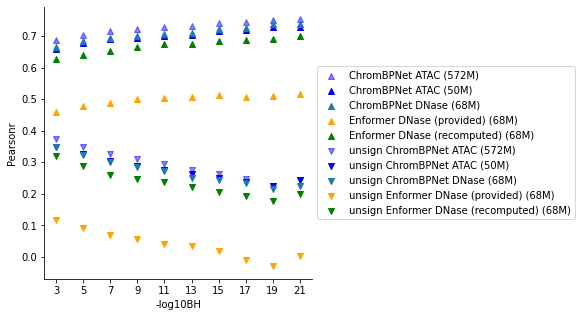

In [43]:
fig, ax = plt.subplots(figsize=(6,5))

colors = ["blue", "blue", "C0"]
alphas= [0.5, 1.0, 1.0, 1.0] 

i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(3,23,2).astype(str), chrombpnet[key], marker="^", label=key, color=colors[i], alpha=alphas[i])
    i+=1


ax.scatter(np.arange(3,23,2).astype(str), enformer_sar ,  marker="^", label="Enformer DNase (provided) (68M)", color="orange")
ax.scatter(np.arange(3,23,2).astype(str), enformer ,  marker="^", label="Enformer DNase (recomputed) (68M)", color="green")

i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(3,23,2).astype(str), chrombpnet_unsigned[key], marker="v", label="unsign "+key, color=colors[i], alpha=alphas[i])
    i+=1
    
ax.scatter(np.arange(3,23,2).astype(str), enformer_unsigned_sar, marker="v", label="unsign " +"Enformer DNase (provided) (68M)", color="orange")
ax.scatter(np.arange(3,23,2).astype(str), enformer_unsigned, marker="v", label="unsign " +"Enformer DNase (recomputed) (68M)", color="green")


ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("-log10BH")
ax.set_ylabel("Pearsonr")
#plt.legend(loc='upper right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.show()

#plt.savefig("subfigs/eu_caqtls_pearsonr_compare.pdf", transparent=True, dpi=300)


In [44]:
import scipy.stats
chrombpnet = {}
chrombpnet_unsigned = {}
enformer = []
enformer_unsigned = []
enformer_sar = []
enformer_unsigned_sar = []
chrombpnet["ChromBPNet DNase (68M)"] = []
chrombpnet["ChromBPNet ATAC (572M)"] = []
chrombpnet["ChromBPNet ATAC (50M)"] = []

chrombpnet_unsigned["ChromBPNet DNase (68M)"] = []
chrombpnet_unsigned["ChromBPNet ATAC (572M)"] = []
chrombpnet_unsigned["ChromBPNet ATAC (50M)"] = []

for threshold in np.arange(3,23,2):
    print(threshold)
    dataf = caqtls[(caqtls["Log10_BF"]>threshold)]
        
    pear = scipy.stats.pearsonr(dataf["ENCSR000EMT.jsd_sign.mean"], dataf["Beta"])
    chrombpnet["ChromBPNet DNase (68M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["ENCSR000EMT.jsd_sign.mean"]), abs(dataf["Beta"]))
    chrombpnet_unsigned["ChromBPNet DNase (68M)"].append(pear[0])    
 
    pear = scipy.stats.pearsonr(dataf["ENCSR637XSC.jsd_sign.mean"], dataf["Beta"])
    chrombpnet["ChromBPNet ATAC (572M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["ENCSR637XSC.jsd_sign.mean"]), abs(dataf["Beta"]))
    chrombpnet_unsigned["ChromBPNet ATAC (572M)"].append(pear[0])    

    pear = scipy.stats.pearsonr(dataf["ENCSR637XSC.sub.50M.jsd_sign.mean"], dataf["Beta"])
    chrombpnet["ChromBPNet ATAC (50M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["ENCSR637XSC.sub.50M.jsd_sign.mean"]), abs(dataf["Beta"]))
    chrombpnet_unsigned["ChromBPNet ATAC (50M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(dataf["enformer_recomputed"]*-1, dataf["Beta"])
    enformer.append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["enformer_recomputed"]), abs(dataf["Beta"]))
    enformer_unsigned.append(pear[0])


    pear = scipy.stats.pearsonr(dataf["DNASE_SAR"], dataf["Beta"])
    enformer_sar.append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["DNASE_SAR"]), abs(dataf["Beta"]))
    enformer_unsigned_sar.append(pear[0])


3
5
7
9
11
13
15
17
19
21


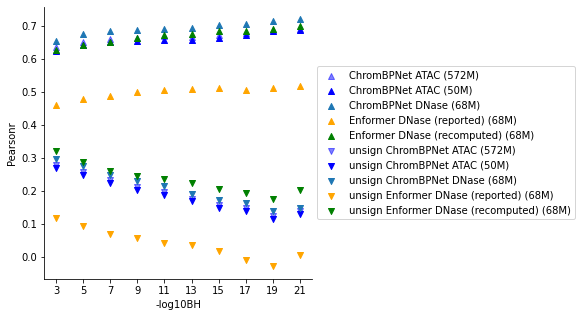

In [45]:
fig, ax = plt.subplots(figsize=(6,5))

colors = ["blue", "blue", "C0"]
alphas= [0.5, 1.0, 1.0, 1.0] 

i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(3,23,2).astype(str), chrombpnet[key], marker="^", label=key, color=colors[i], alpha=alphas[i])
    i+=1


ax.scatter(np.arange(3,23,2).astype(str), enformer_sar ,  marker="^", label="Enformer DNase (reported) (68M)", color="orange")
ax.scatter(np.arange(3,23,2).astype(str), enformer ,  marker="^", label="Enformer DNase (recomputed) (68M)", color="green")

i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(3,23,2).astype(str), chrombpnet_unsigned[key], marker="v", label="unsign "+key, color=colors[i], alpha=alphas[i])
    i+=1
    
ax.scatter(np.arange(3,23,2).astype(str), enformer_unsigned_sar, marker="v", label="unsign " +"Enformer DNase (reported) (68M)", color="orange")
ax.scatter(np.arange(3,23,2).astype(str), enformer_unsigned, marker="v", label="unsign " +"Enformer DNase (recomputed) (68M)", color="green")


ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("-log10BH")
ax.set_ylabel("Pearsonr")
#plt.legend(loc='upper right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.show()

#plt.savefig("subfigs/eu_caqtls_pearsonr_compare_jsd.pdf", transparent=True, dpi=300)


# Enrichment plots

In [25]:
import matplotlib

import seaborn as sns

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['figure.figsize'] = [12, 10]

def plot_enrichment_curves(df, compare_score, model_score, output_file, compare_score_ascending=False, model_score_ascending=True,
                           thresh_list=[0.5, 0.1, 0.05, 0.01, 0.005, 0.001], subsample=False, ymax='auto', debug=False):
    by_thresh_dict = {'score':[], 'ratio':[], 'thresh':[]}
    
    #df[model_score+"_abs"] = np.abs(df[model_score])
    #model_score = model_score+"_abs"
    print(model_score)
    #thresh_list = [df[model_score].quantile(1-0.5), df[model_score].quantile(1-0.1), df[model_score].quantile(1-0.05), df[model_score].quantile(1-0.01),
    #              df[model_score].quantile(1-0.005), df[model_score].quantile(1-0.001), df[model_score].quantile(1-0.0005), df[model_score].quantile(1-0.0001)]
    print(thresh_list)
    for thresh in thresh_list:
        df[compare_score].fillna(0, inplace=True)
        sample_df = df.sort_values(by=[compare_score, model_score], ascending=[False, True])
        #print(sample_df.head())
        #print(sample_df.tail())
        print(thresh)
        print(sum(sample_df[model_score] < thresh))
        ratio = len(sample_df.loc[sample_df[model_score] < thresh]) / len(sample_df)
        sample_df['sig'] = sample_df[model_score].apply(lambda x: x < thresh)
        sample_df['expected'] = [ratio] * len(sample_df)
        expected = sample_df['expected'].cumsum().tolist()
        observed = sample_df['sig'].cumsum().tolist()
        
        enrich_ratio = np.array(observed) / np.array(expected)
        compare_vals = sample_df[compare_score].tolist()
        enrich_ratio = enrich_ratio.tolist()
        assert len(compare_vals) == len(enrich_ratio)
        by_thresh_dict['ratio'].extend(enrich_ratio)
        by_thresh_dict['score'].extend(compare_vals)
        by_thresh_dict['thresh'].extend([thresh] * len(sample_df))
        
        if debug:
            print(thresh)
            print('Expected:', expected[:10])
            print('Observed:', observed[:10])
            print('Ratio:', enrich_ratio[:10])
            print('Compare Scores:', compare_vals[:10])
            print()
        
    by_thresh_df = pd.DataFrame(by_thresh_dict)
    by_thresh_df.sort_values(by=['score'], ascending=False, inplace=True)
    if subsample:
        by_thresh_df = pd.concat([by_thresh_df.iloc[:20000,].copy(), by_thresh_df.iloc[20000:,].copy().sample(30000)])
    return by_thresh_df
    #plt.show()

In [26]:
by_thresh_df = plot_enrichment_curves(caqtls,
                       compare_score='Log10_BF', model_score='ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean.pval',
                       compare_score_ascending=False, model_score_ascending=True, output_file="lcl_caqtls_latest.pdf")


ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean.pval
[0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
0.5
116126
0.1
39073
0.05
21758
0.01
5856
0.005
3372
0.001
865


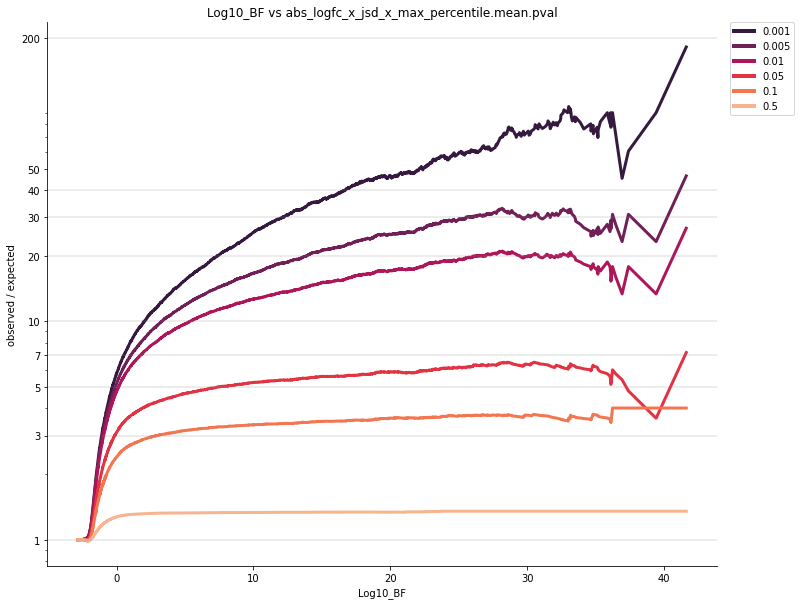

In [27]:
compare_score='Log10_BF'
model_score='abs_logfc_x_jsd_x_max_percentile.mean.pval'
ax = sns.lineplot(data=by_thresh_df, x='score', y='ratio', linewidth=3, ci=None,
                  hue='thresh', palette=sns.color_palette('rocket', 6))
leg = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
for line in leg.get_lines():
    line.set_linewidth(4)
xmax="auto"
ymax="auto"
output_file="lcl_caqtls_latest.pdf"
ax.set(title=compare_score + ' vs ' + model_score, xlabel=compare_score, ylabel='observed / expected')
ax.set(yscale='log')
ax.set_yticks([1,  3,  5, 7, 10, 20, 30, 40, 50, 200])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.axhline(y=1, color='grey', linestyle='-', alpha=0.2)

ax.axhline(y=3, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=5, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=7, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=10, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=20, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=30, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=40, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=200, color='grey', linestyle='-', alpha=0.2)

ax.spines[["top", "right"]].set_visible(False)

plt.savefig("subfigs/eu_caqtls_enrichement_atac.pdf", transparent=True, dpi=300)

In [15]:
by_thresh_df = plot_enrichment_curves(caqtls,
                       compare_score='Log10_BF', model_score='ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean.pval',
                       compare_score_ascending=False, model_score_ascending=True, output_file="lcl_caqtls_latest.pdf")


ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean.pval
[0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
0.5
111403
0.1
33654
0.05
18156
0.01
4469
0.005
2448
0.001
596


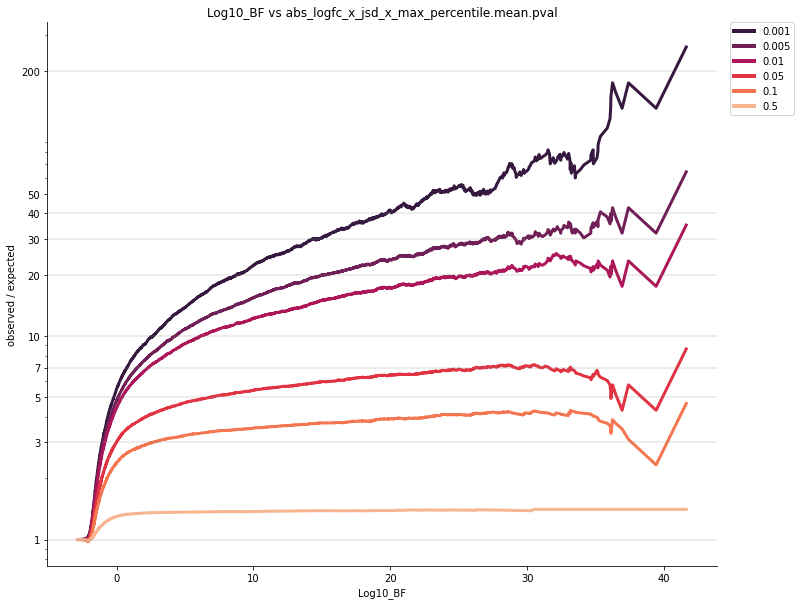

In [16]:
compare_score='Log10_BF'
model_score='abs_logfc_x_jsd_x_max_percentile.mean.pval'
ax = sns.lineplot(data=by_thresh_df, x='score', y='ratio', linewidth=3, ci=None,
                  hue='thresh', palette=sns.color_palette('rocket', 6))
leg = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
for line in leg.get_lines():
    line.set_linewidth(4)
xmax="auto"
ymax="auto"
output_file="lcl_caqtls_latest.pdf"
ax.set(title=compare_score + ' vs ' + model_score, xlabel=compare_score, ylabel='observed / expected')
ax.set(yscale='log')
ax.set_yticks([1,  3,  5, 7, 10, 20, 30, 40, 50, 200])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.axhline(y=1, color='grey', linestyle='-', alpha=0.2)

ax.axhline(y=3, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=5, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=7, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=10, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=20, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=30, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=40, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=200, color='grey', linestyle='-', alpha=0.2)

ax.spines[["top", "right"]].set_visible(False)

plt.savefig("subfigs/eu_caqtls_enrichement_dnase.pdf", transparent=True, dpi=300)